In [1]:
import string
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from tqdm import tqdm

import sys
sys.setrecursionlimit(100000)
print(sys.getrecursionlimit())

100000


In [2]:
kernel = [[1, 1, 1],
          [1, 0, 1],
          [1, 1, 1]]

In [3]:
M = np.zeros((7,8))
M[1,4] = 1
M[2,2] = 1
M[2,4] = 1
M[2,5] = 1
M[3,1] = 1
M[3,2] = 1
M[3,5] = 1
M[3,6] = 1
M[4,2] = 1
M[4,4] = 1
M[4,5] = 1
M[5,4] = 1

In [63]:
class Maze:
  def __init__(self, initial_position, goal_postion, current_state):
    self.initial_position = initial_position
    self.goal_postion = goal_postion
    self.current_state = current_state
    self.update_num = 0
    self.rows = len(self.current_state)
    self.columns = len(self.current_state[0])
    self.maze_matrix = np.zeros((self.rows * self.columns, self.rows * self.columns))
    self.maze_labels = self._get_maze_labels()

  def _get_alphbet(self):
    alphabet = list(string.ascii_lowercase)
    k = 1
    temp = []
    while len(temp) < self.rows * self.columns:
      keywords = [''.join(i) for i in itertools.product(alphabet, repeat = k)]
      temp.extend(keywords)
      k += 1
    temp = [temp[i:i+self.columns] for i in range(0,len(temp),self.columns)]
    return(temp)

  def _get_maze_labels(self):
    LABELS = self._get_alphbet()
    return(LABELS[:self.rows])
  
  def _update_rule(self, temp, M_sum, i, j, first=False):
    if first:
      if (M_sum[i][j] == 3) and self.current_state[i][j] == 0:
        temp[i][j] = 1
    else:
      if (M_sum[i][j] == 3 or M_sum[i][j] == 2) and self.current_state[i][j] == 0:
        temp[i][j] = 1
    if (M_sum[i][j] >=4 and M_sum[i][j] < 7) and self.current_state[i][j] == 1:
      temp[i][j] = 1

  def update(self, first=False):
    temp = np.zeros((self.rows,self.columns))
    kernel = [[1, 1, 1],[1, 0, 1],[1, 1, 1]]
    M_sum = convolve(self.current_state, kernel, mode='constant')
    for i in range(self.rows):
      for j in range(self.columns):
        self._update_rule(temp,M_sum,i,j, first)
    self.current_state = temp
    self.current_state[self.rows - 1][self.columns - 1] = 0
    self.current_state[0][0] = 0
    self.update_num += 1

  def _next_path(self,point):
    temp = []
    if point[0] - 1 >= 0:
      if self.current_state[point[0] - 1][point[1]] != 1:
        temp.append((point[0] - 1,point[1]))
    if point[0] + 1 < self.rows:  
      if self.current_state[point[0] + 1][point[1]] != 1:
        temp.append((point[0] + 1,point[1]))
    if point[1] - 1 >= 0:
      if self.current_state[point[0]][point[1] - 1] != 1:
        temp.append((point[0],point[1] - 1))
    if point[1] + 1 < self.columns:
      if self.current_state[point[0]][point[1] + 1] != 1:
        temp.append((point[0],point[1] + 1))
    return(temp)
  
  def create_maze(self):
    ITER = 30
    temp = [item for sublist in self.maze_labels for item in sublist]
    i = 0
    self.maze_dict = {}
    for element in itertools.product(range(self.rows), range(self.columns)):
        self.maze_dict[element] = (temp[i], i)
        i+=1
    rodadas = {}
    for i in range(ITER):
        rodadas[i] = []     
    origin = [(0,0)]
    self.update(first= True)
    for i in range(ITER):
        for p in origin:
            rodadas[i].append((p, self._next_path(p)))
        ter = set()    
        for _ , kk in rodadas[i]:
            for k in kk:
                ter.add(k)
        origin = list(ter)
        self.update()
    return(rodadas)

  def solve(self):
    pass

  def print_state(self):
    plt.matshow(self.current_state, cmap=plt.cm.Blues)

  def print_maze(self):    
    plt.matshow(self.maze_matrix, cmap=plt.cm.Blues)
    

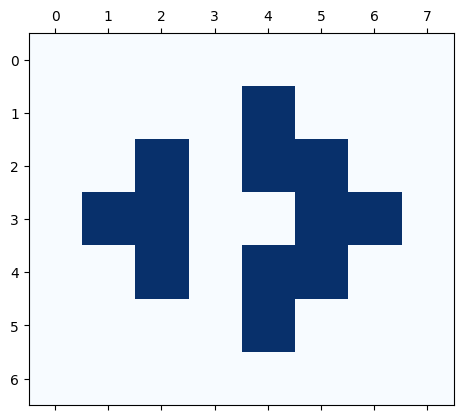

In [5]:
maze = Maze("a","bd",M)
maze.print_state()

In [64]:
maze = Maze("a","bd",M)
temp = maze.create_maze()


def find(PATTERN):
    chave = 0
    for kk, vv in temp.items():
        for k, _ in vv:
            if k == PATTERN:
                print(f"{PATTERN} found in {kk}")
                chave = 1
                break
        if chave == 1:
            break
    if chave == 0:
        print(f"{PATTERN} not found")
for j in (5, 6, 7):
    for i in range(7):
        PATTERN = (i,j)
        find(PATTERN)

(0, 5) found in 17
(1, 5) found in 18
(2, 5) found in 27
(3, 5) found in 16
(4, 5) found in 19
(5, 5) found in 20
(6, 5) found in 21
(0, 6) found in 18
(1, 6) found in 19
(2, 6) found in 28
(3, 6) found in 19
(4, 6) found in 24
(5, 6) found in 21
(6, 6) found in 22
(0, 7) found in 19
(1, 7) found in 28
(2, 7) found in 29
(3, 7) found in 20
(4, 7) found in 23
(5, 7) found in 22
(6, 7) found in 23


In [65]:
temp

{0: [((0, 0), [(1, 0), (0, 1)])],
 1: [((1, 0), [(0, 0), (2, 0), (1, 1)]), ((0, 1), [(1, 1), (0, 0), (0, 2)])],
 2: [((0, 2), [(1, 2), (0, 1)]),
  ((1, 1), [(0, 1), (2, 1), (1, 0), (1, 2)]),
  ((2, 0), [(1, 0), (3, 0), (2, 1)]),
  ((0, 0), [(1, 0), (0, 1)])],
 3: [((0, 1), [(1, 1), (0, 0)]),
  ((1, 2), [(1, 1)]),
  ((2, 1), [(1, 1), (3, 1), (2, 0)]),
  ((3, 0), [(2, 0), (4, 0), (3, 1)]),
  ((1, 0), [(0, 0), (2, 0), (1, 1)])],
 4: [((4, 0), [(3, 0), (5, 0)]),
  ((0, 0), [(1, 0)]),
  ((3, 1), [(3, 0), (3, 2)]),
  ((1, 1), [(1, 0)]),
  ((2, 0), [(1, 0), (3, 0)])],
 5: [((1, 0), [(0, 0), (2, 0), (1, 1)]),
  ((3, 2), [(2, 2), (4, 2), (3, 1), (3, 3)]),
  ((5, 0), [(4, 0), (6, 0), (5, 1)]),
  ((3, 0), [(2, 0), (4, 0), (3, 1)])],
 6: [((4, 0), [(3, 0), (5, 0)]),
  ((6, 0), [(5, 0)]),
  ((0, 0), [(1, 0)]),
  ((3, 1), [(3, 0), (3, 2)]),
  ((1, 1), [(1, 0), (1, 2)]),
  ((2, 0), [(1, 0), (3, 0)]),
  ((5, 1), [(5, 0), (5, 2)]),
  ((4, 2), [(3, 2), (5, 2), (4, 3)]),
  ((3, 3), [(2, 3), (4, 3), (3, 2

In [29]:
maze = Maze("a","bd",M)
# maze.print_all_maze()

20

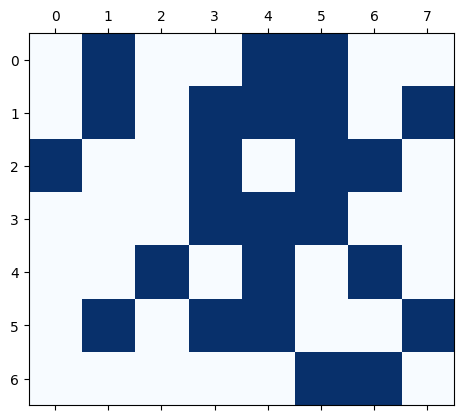

In [51]:
maze.update()
maze.print_state()
maze.update_num

In [52]:
kernel = [[1, 1, 1],[1, 0, 1],[1, 1, 1]]
M_sum = convolve(maze.current_state, kernel, mode='constant')
M_sum

array([[2., 1., 3., 3., 4., 3., 3., 1.],
       [3., 2., 4., 3., 6., 5., 5., 1.],
       [1., 2., 4., 4., 8., 5., 4., 2.],
       [1., 2., 3., 4., 5., 5., 4., 2.],
       [1., 2., 3., 6., 5., 5., 2., 2.],
       [1., 1., 3., 3., 3., 5., 4., 2.],
       [1., 1., 2., 2., 3., 2., 2., 2.]])

In [53]:
maze.current_state

array([[0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0.]])

21

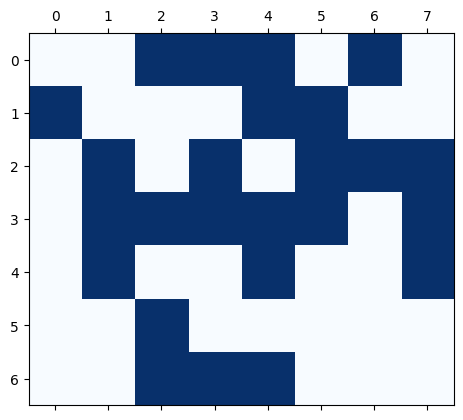

In [54]:
maze.update()
maze.print_state()
maze.update_num

22

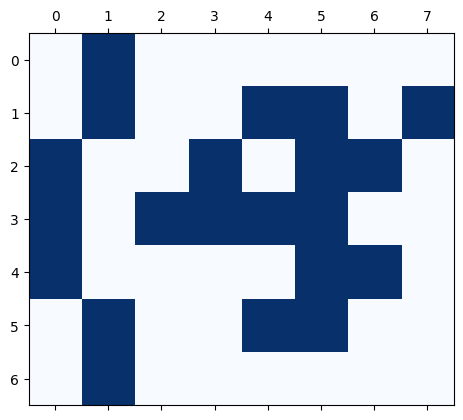

In [55]:
maze.update()
maze.print_state()
maze.update_num

23

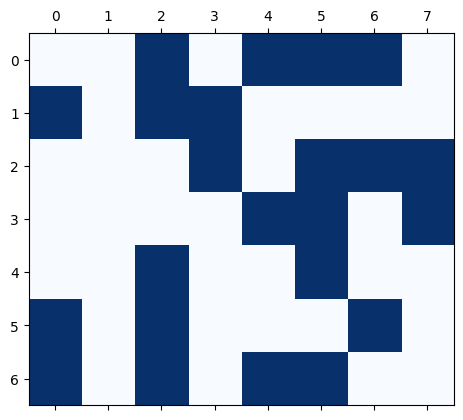

In [56]:
maze.update()
maze.print_state()
maze.update_num